# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

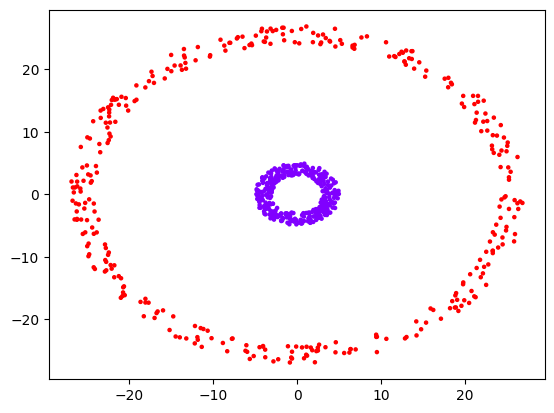

In [4]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "rainbow")

In [ ]:
# simplemente hemos generado una distribución de anillos

Ver si podemos aplicar k-means en este tipo de distribución

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(2).fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
clust = km.predict(data)

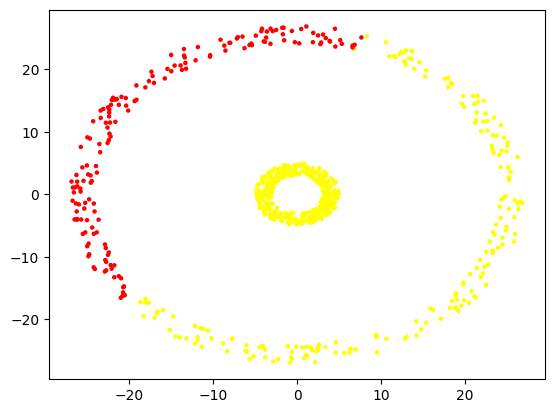

In [8]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

In [ ]:
# vemos que aqui no funciona

entonces vamos con los k-medoides

# Algoritmo de los K Medoides

In [9]:
!pip install pyclust
!pip install treelib
from pyclust import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclust: filename=pyclust-0.2.0-py3-none-any.whl size=12804 sha256=8de4e6924b44d91ba45ebd8f4800e8b77cb9abe74fbbfa0657654d8c1a4a6552
  Stored in directory: /root/.cache/pip/wheels/e9/09/c1/1be80a3ef855b57a1433f935c90cd6641dc781da23b8162c58
Successfully built pyclust
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
kmed = KMedoids(2).fit_predict(data)

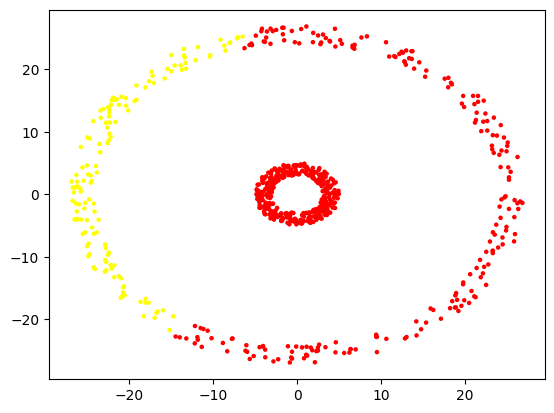

In [16]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

In [ ]:
# no hay mucha mejora, vuelve a ocurrir lo de antes....

##Algoritmo del Clustering Espectral

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
clust = SpectralClustering(2).fit_predict(data)

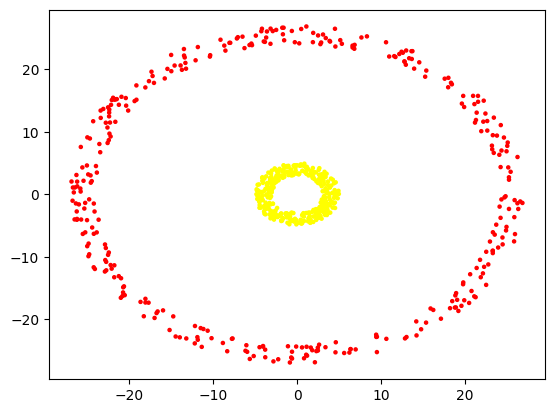

In [19]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

In [ ]:
# esta técnica sí funciona

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral